<a href="https://colab.research.google.com/github/LandryArgabright/corona/blob/master/Corona_Virus_Visual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/RamiKrispin/coronavirus/master/csv/coronavirus.csv')

In [0]:
print(df.describe().transpose())
print([i for i in df.columns])

         count       mean         std  ...      50%        75%         max
Lat    80752.0  20.853748   24.599305  ...  22.3000  40.152925     71.7069
Long   80752.0  24.276041   69.369032  ...  21.7453  81.000000    178.0650
cases  80752.0  60.424943  740.394808  ...   0.0000   1.000000  36188.0000

[3 rows x 8 columns]
['Province.State', 'Country.Region', 'Lat', 'Long', 'date', 'cases', 'type']


Text(0.5, 1.0, 'Cases in China')

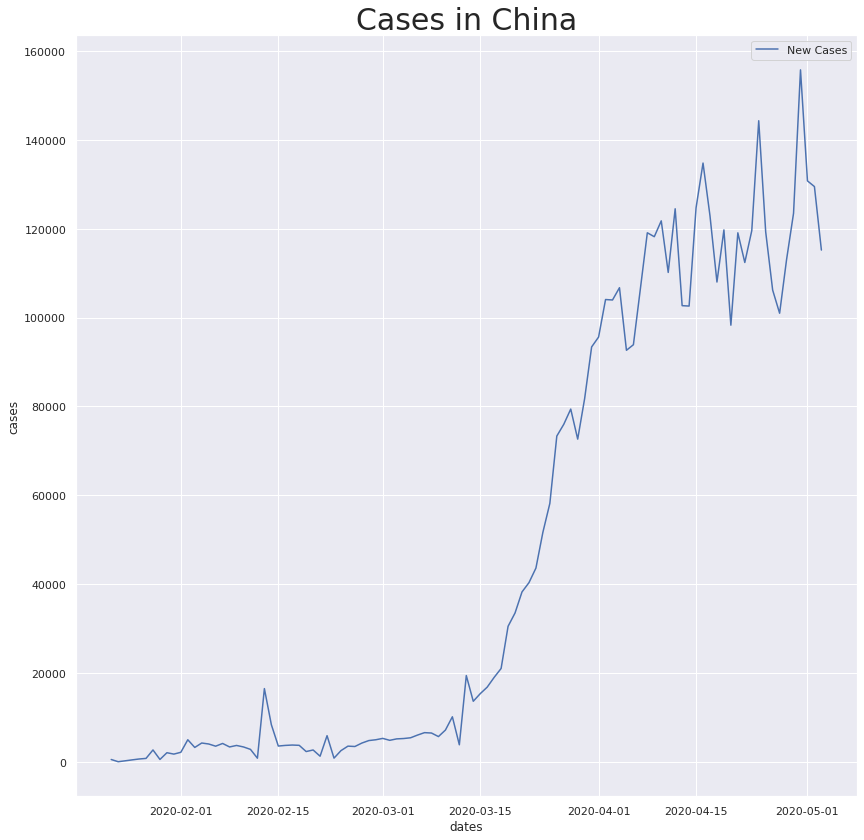

In [0]:
# Sum of cases per day
sns.set(style="darkgrid", rc={'figure.figsize':(14,14)})
dates_cases = df.groupby(['date']).sum()
dates_cases = dates_cases.drop(['Lat','Long'], axis=1)
dates_cases['dates'] = dates_cases.index
dates_cases['dates'] = pd.to_datetime(dates_cases['dates'])
g = sns.lineplot(x=dates_cases['dates'], y=dates_cases['cases'], label="New Cases");
# China Cases
plt.title("Cases in China", fontsize=30)

Text(0.5, 1.0, 'China vs Sum of Other Countries (# of Cases)')

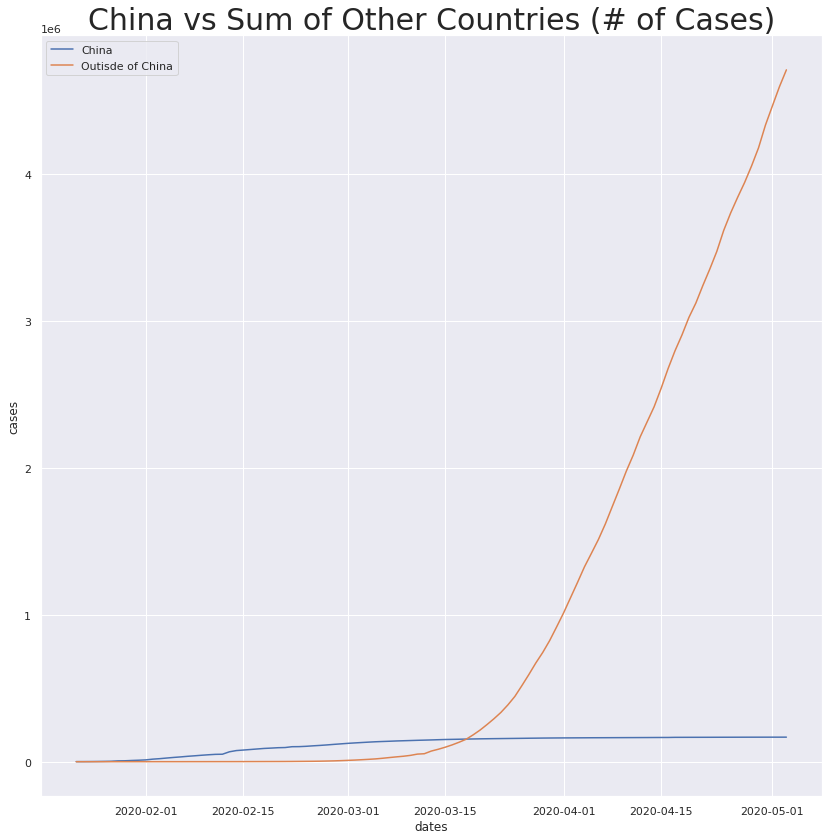

In [0]:
# China Compared to other Locations

mask = df['Country.Region'] == "China"
china, others = df[mask], df[~mask]

china, others = china.groupby(['date']).sum(), others.groupby(['date']).sum()
china['dates'], others['dates'] = china.index, others.index
china['dates'], others['dates'] = pd.to_datetime(china['dates']), pd.to_datetime(others['dates'])
china['cases'], others['cases'] = china['cases'].cumsum(), others['cases'].cumsum()


sns.lineplot(data=china, x='dates', y='cases', label="China")
sns.lineplot(data=others, x='dates', y='cases', label="Outisde of China");
# China vs Other Countries (# of Cases)
plt.title('China vs Sum of Other Countries (# of Cases)', fontsize=30)

In [0]:
countries = df.groupby(['Country.Region']).sum()
countries = countries.sort_values(by='cases', ascending=False)

In [0]:
# Locations with Top Cases
countries[:5]
top = [t for t in countries.index[:5]]

In [0]:
countries

,Lat,Long,cases
Country.Region,,,
US,11460.8718,-29575.2861,1405874
Spain,12360.0000,-1236.0000,361632
Italy,13287.0000,3708.0000,321255
Germany,15759.0000,2781.0000,303130
France,28230.9816,18453.2328,244710
...,...,...,...
Bhutan,8501.8878,27943.9824,12
MS Zaandam,0.0000,0.0000,11
Western Sahara,7482.5895,-3981.7122,11


In [0]:
def countries_top(names):
    # list of dfs of top countries
    dfs = []

    for t in names:
        mask = df["Country.Region"] == t
        temp = df[mask].groupby(['date','Country.Region']).sum()
        temp['values'] = temp.index
        temp[["date", "country"]] = pd.DataFrame(temp['values'].to_list(), index=temp.index)

        dfs.append(temp)
    
    dataframes = {}
    for i in range(len(top)):
        dfs[i]['cases'] = dfs[i]['cases'].cumsum()
        dfs[i]['date'] = pd.to_datetime(dfs[i]['date'])
        dataframes[top[i]] = dfs[i]
    
    return dataframes

In [0]:
dfs = countries_top(top)

In [0]:
[t for t in dfs.keys()]

['US', 'Spain', 'Italy', 'Germany', 'France']

In [0]:
def viz(dict_dfs):
    for t in dict_dfs.keys():
        sns.lineplot(data=dict_dfs[t], x="date", y="cases", label=t)

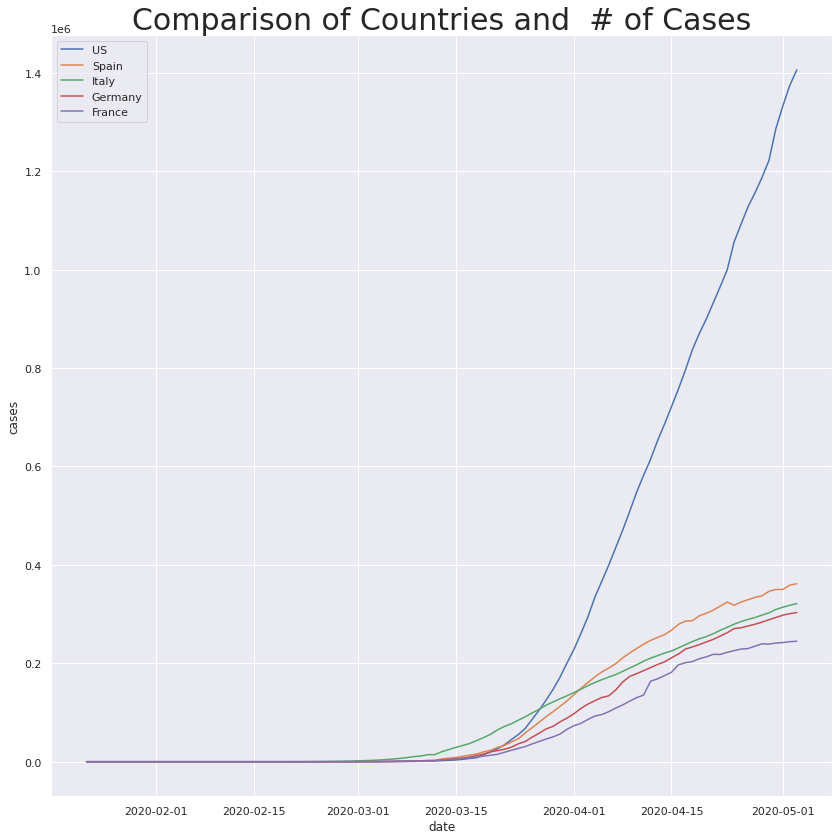

In [0]:
viz(dfs)
plt.title("Comparison of Countries and  # of Cases", fontsize=30);